In [1]:
from builtins import range, input
import os
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout,BatchNormalization,Activation
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten,InputLayer
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


import cv2
from glob import glob

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.densenet import DenseNet169

In [2]:
dement_path = 'F:/Major Project/Alzheimers-Disease-Detection-main/train/MildDemented'
nondement_path = 'F:/Major Project/Alzheimers-Disease-Detection-main/train/NonDemented'

In [3]:
NonDemfiles = glob( nondement_path +'/*' )
Demfiles = glob( dement_path + '/*' )

In [4]:
print("First 5 NonDem Files: ",NonDemfiles[0:5])
print("Total Count: ",len(NonDemfiles))
print("First 5 MildDem Files: ",Demfiles[0:5])
print("Total Count: ",len(Demfiles))

First 5 NonDem Files:  ['F:/Major Project/Alzheimers-Disease-Detection-main/train/NonDemented\\nonDem0.jpg', 'F:/Major Project/Alzheimers-Disease-Detection-main/train/NonDemented\\nonDem1.jpg', 'F:/Major Project/Alzheimers-Disease-Detection-main/train/NonDemented\\nonDem10.jpg', 'F:/Major Project/Alzheimers-Disease-Detection-main/train/NonDemented\\nonDem100.jpg', 'F:/Major Project/Alzheimers-Disease-Detection-main/train/NonDemented\\nonDem101.jpg']
Total Count:  500
First 5 MildDem Files:  ['F:/Major Project/Alzheimers-Disease-Detection-main/train/MildDemented\\mildDem0.jpg', 'F:/Major Project/Alzheimers-Disease-Detection-main/train/MildDemented\\mildDem1.jpg', 'F:/Major Project/Alzheimers-Disease-Detection-main/train/MildDemented\\mildDem10.jpg', 'F:/Major Project/Alzheimers-Disease-Detection-main/train/MildDemented\\mildDem100.jpg', 'F:/Major Project/Alzheimers-Disease-Detection-main/train/MildDemented\\mildDem101.jpg']
Total Count:  500


# Data Preprocessing

In [5]:
Dem_labels = []
NonDem_labels = []

Dem_images=[]
NonDem_images=[]

for i in range(len(Demfiles)):
  image = cv2.imread(Demfiles[i]) 
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
  image = cv2.resize(image,(229,229)) 
  Dem_images.append(image) 
  Dem_labels.append('Demented') 
for i in range(len(NonDemfiles)):
  image = cv2.imread(NonDemfiles[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image,(229,229))
  NonDem_images.append(image)
  NonDem_labels.append('NonDemented')

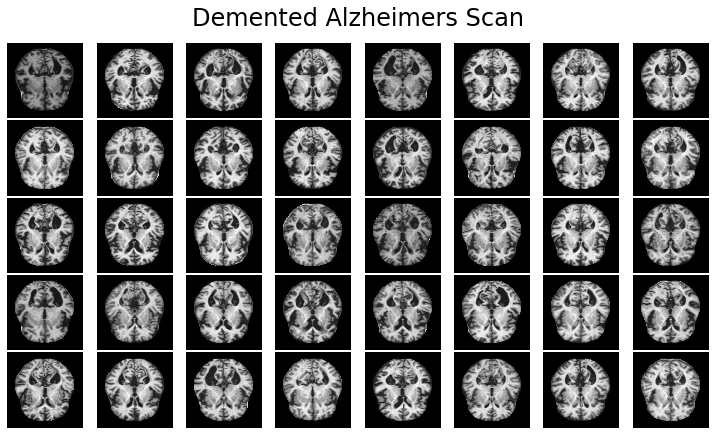

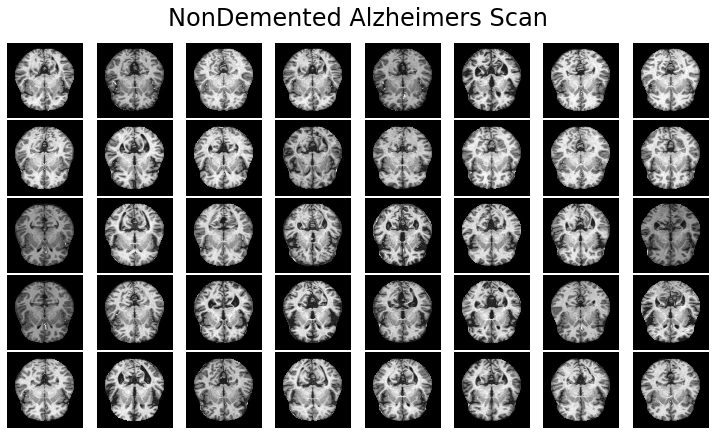

In [6]:
def plot_images(images, title):
    nrows, ncols = 5, 8
    figsize = [10, 6]

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, facecolor=(1, 1, 1))

    for i, axi in enumerate(ax.flat):
        axi.imshow(images[i])
        axi.set_axis_off()

    plt.suptitle(title, fontsize=24)
    plt.tight_layout(pad=0.2, rect=[0, 0, 1, 0.9])
    plt.show()
plot_images(Dem_images, 'Demented Alzheimers Scan')
plot_images(NonDem_images, 'NonDemented Alzheimers Scan')

In [7]:
Dem_images = np.array(Dem_images) / 255
NonDem_images = np.array(NonDem_images) / 255

# Splitting Dataset into test set and training set

In [8]:
Dem_x_train, Dem_x_test, Dem_y_train, Dem_y_test = train_test_split(
    Dem_images, Dem_labels, test_size=0.2)
NonDem_x_train, NonDem_x_test, NonDem_y_train, NonDem_y_test = train_test_split(
    NonDem_images, NonDem_labels, test_size=0.2)


X_train = np.concatenate((NonDem_x_train, Dem_x_train), axis=0)
X_test = np.concatenate((NonDem_x_test, Dem_x_test), axis=0)
y_train = np.concatenate((NonDem_y_train, Dem_y_train), axis=0)
y_test = np.concatenate((NonDem_y_test, Dem_y_test), axis=0)

y_train = LabelBinarizer().fit_transform(y_train)
y_train = to_categorical(y_train)

y_test = LabelBinarizer().fit_transform(y_test)
y_test = to_categorical(y_test)

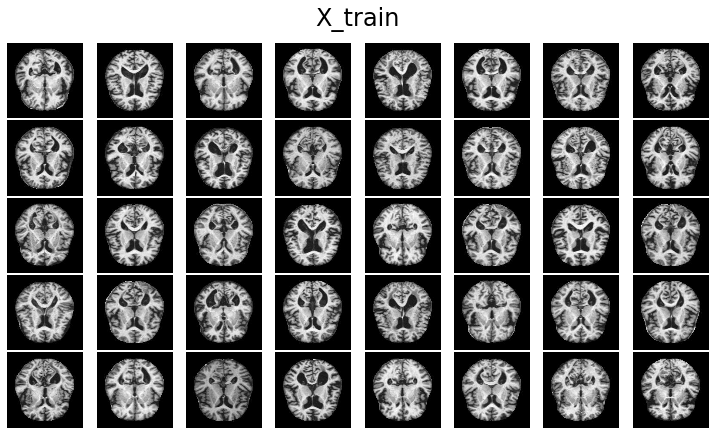

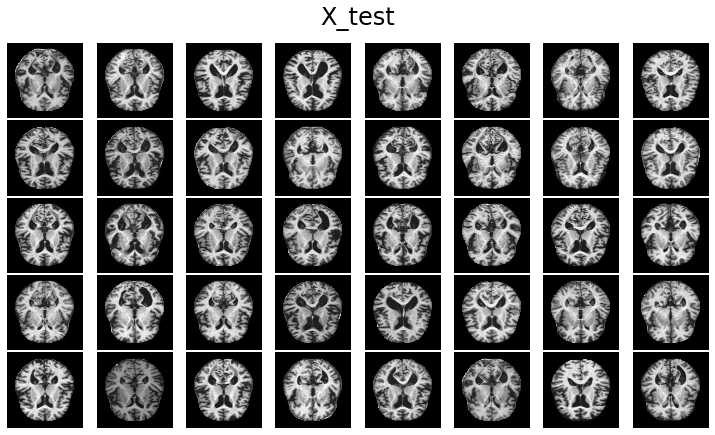

In [9]:
plot_images(Dem_x_train, 'X_train')
plot_images(Dem_x_test, 'X_test')

In [10]:
y_test

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

# DenseNet

In [11]:
base_model = DenseNet169(input_shape=(229,229,3), 
                         include_top=False,
                         weights="imagenet")

In [12]:
for layer in base_model.layers:
    layer.trainable=False

In [13]:
# Building Model

model=Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet169 (Model)          (None, 7, 7, 1664)        12642880  
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 1664)        0         
_________________________________________________________________
flatten (Flatten)            (None, 81536)             0         
_________________________________________________________________
batch_normalization (BatchNo (None, 81536)             326144    
_________________________________________________________________
dense (Dense)                (None, 2048)              166987776 
_________________________________________________________________
batch_normalization_1 (Batch (None, 2048)              8192      
_________________________________________________________________
activation (Activation)      (None, 2048)              0

In [15]:
# Model Compile 

model.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
)

In [16]:
#Image Augmentation
train_aug = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
filepath = './best_weights.hdf5'

early = EarlyStopping(monitor = 'accuracy', 
                              mode = 'max' , 
                              patience = 15,
                              verbose = 1)

checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'accuracy', 
                                mode='max', 
                                save_best_only=True, 
                                verbose = 1)


callback_list = [early, checkpoint]

In [18]:
history = model.fit(train_aug.flow(X_train, y_train, batch_size=32),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) / 64,
                    steps_per_epoch=len(X_train) / 64,
                    epochs=100,
                   callbacks = [early,checkpoint])

Epoch 1/100
13/12 [===============================] - ETA: -3s - loss: 0.7922 - accuracy: 0.7356
Epoch 00001: accuracy improved from -inf to 0.73558, saving model to ./best_weights.hdf5
13/12 [===============================] - 169s 13s/step - loss: 0.7922 - accuracy: 0.7356 - val_loss: 1.3786 - val_accuracy: 0.8750
Epoch 2/100
13/12 [===============================] - ETA: -2s - loss: 0.6422 - accuracy: 0.7716
Epoch 00002: accuracy improved from 0.73558 to 0.77163, saving model to ./best_weights.hdf5
13/12 [===============================] - 126s 10s/step - loss: 0.6422 - accuracy: 0.7716 - val_loss: 1.1302 - val_accuracy: 0.8800
Epoch 3/100
13/12 [===============================] - ETA: -2s - loss: 0.4207 - accuracy: 0.8486
Epoch 00003: accuracy improved from 0.77163 to 0.84856, saving model to ./best_weights.hdf5
13/12 [===============================] - 128s 10s/step - loss: 0.4207 - accuracy: 0.8486 - val_loss: 0.7351 - val_accuracy: 0.8750
Epoch 4/100
13/12 [=====================

13/12 [===============================] - ETA: -2s - loss: 0.2045 - accuracy: 0.9111
Epoch 00029: accuracy did not improve from 0.91106
13/12 [===============================] - 108s 8s/step - loss: 0.2045 - accuracy: 0.9111 - val_loss: 0.1909 - val_accuracy: 0.9200
Epoch 30/100
13/12 [===============================] - ETA: -3s - loss: 0.1757 - accuracy: 0.9207
Epoch 00030: accuracy improved from 0.91106 to 0.92067, saving model to ./best_weights.hdf5
13/12 [===============================] - 173s 13s/step - loss: 0.1757 - accuracy: 0.9207 - val_loss: 0.1667 - val_accuracy: 0.9150
Epoch 31/100
13/12 [===============================] - ETA: -2s - loss: 0.2330 - accuracy: 0.9135
Epoch 00031: accuracy did not improve from 0.92067
13/12 [===============================] - 108s 8s/step - loss: 0.2330 - accuracy: 0.9135 - val_loss: 0.1615 - val_accuracy: 0.9200
Epoch 32/100
13/12 [===============================] - ETA: -3s - loss: 0.2193 - accuracy: 0.9207
Epoch 00032: accuracy did not imp

In [20]:
y_pred1 = model.predict(np.array(X_test))
y_pred1

array([[1.52083859e-01, 8.47916126e-01],
       [4.75758327e-07, 9.99999523e-01],
       [5.30249299e-03, 9.94697452e-01],
       [9.48785245e-01, 5.12147397e-02],
       [8.95795984e-06, 9.99991059e-01],
       [4.08388264e-02, 9.59161222e-01],
       [2.91029632e-01, 7.08970428e-01],
       [9.59634860e-08, 9.99999881e-01],
       [2.01878765e-06, 9.99997973e-01],
       [6.66776597e-02, 9.33322370e-01],
       [1.06389029e-06, 9.99998927e-01],
       [3.29152584e-01, 6.70847476e-01],
       [6.91733370e-03, 9.93082643e-01],
       [2.91906483e-03, 9.97080863e-01],
       [9.64839477e-03, 9.90351617e-01],
       [2.76711624e-04, 9.99723256e-01],
       [7.87292520e-05, 9.99921322e-01],
       [7.66502172e-02, 9.23349798e-01],
       [1.14712780e-02, 9.88528669e-01],
       [1.81313044e-05, 9.99981880e-01],
       [3.40530755e-06, 9.99996543e-01],
       [1.62706133e-02, 9.83729422e-01],
       [5.20491903e-06, 9.99994755e-01],
       [9.26153152e-04, 9.99073863e-01],
       [4.087359

Confusion Matrix without Normalization


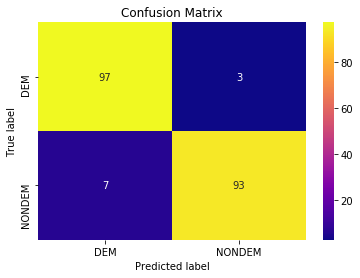

Confusion Matrix with Normalized Values


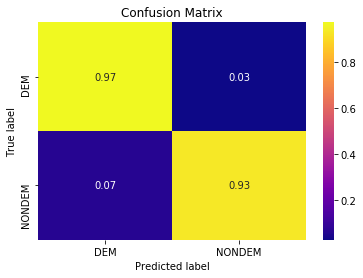

In [21]:
def plot_confusion_matrix(normalize):
  classes = ['DEM','NONDEM']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_test.argmax(axis=1), y_pred1.argmax(1),normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.savefig('VGG19_Confusion_Matrix.png')
  plt.show()
 
print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)
 
print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(axis=1), y_pred1.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       100
           1       0.97      0.93      0.95       100

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



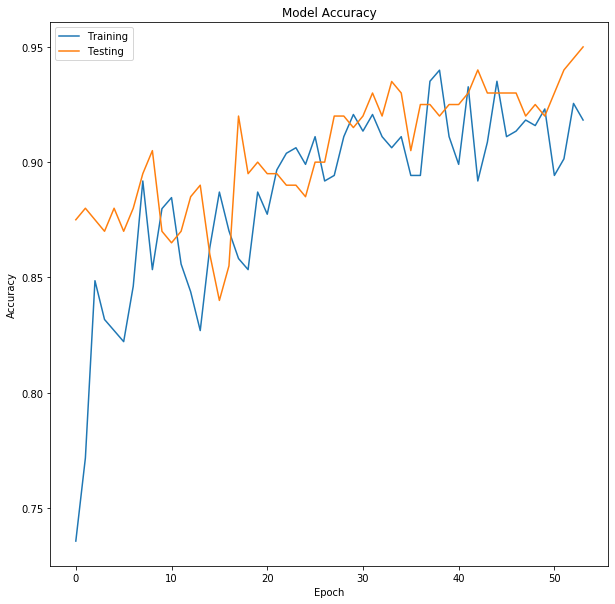

In [23]:
plt.figure(figsize=(10,10))
 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
 
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
 
plt.legend(['Training', 'Testing'])
plt.savefig('VGG19_ct_accuracy.png')
plt.show()

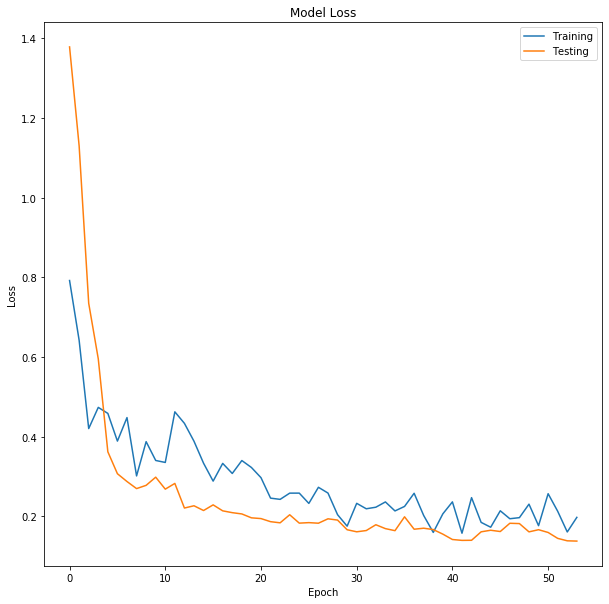

In [24]:
plt.figure(figsize=(10,10))
 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
 
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
 
plt.legend(['Training', 'Testing'])
plt.savefig('VGG19_dem_loss.png')
plt.show()

# VGG19

In [26]:
VGGmodel = VGG19(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(229, 229, 3)))

outputs = VGGmodel.output
outputs = Flatten(name="flatten")(outputs)
outputs = Dropout(0.4)(outputs)
outputs = Dense(2, activation="softmax")(outputs)

model1 = Model(inputs=VGGmodel.input, outputs=outputs)

for layer in VGGmodel.layers:
    layer.trainable = False

model1.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
)

In [27]:
model1.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 229, 229, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 229, 229, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 229, 229, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 114, 114, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 114, 114, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 114, 114, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 57, 57, 128)       0     

In [28]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
filepath = 'Weights_AD_Model_VGG19.hdf5'

earlystopping = EarlyStopping(monitor = 'accuracy', 
                              mode = 'max' , 
                              patience = 15,
                              verbose = 1)

chckpoint    = ModelCheckpoint(filepath, 
                                monitor = 'accuracy', 
                                mode='max', 
                                save_best_only=True, 
                                verbose = 1)


callback_list2 = [earlystopping, chckpoint]

In [29]:
history1 = model1.fit(train_aug.flow(X_train, y_train, batch_size=64),
                    validation_data=(X_test, y_test),
                    validation_steps=len(X_test) / 64,
                    steps_per_epoch=len(X_train) / 64,
                    epochs=100,
                      callbacks= callback_list2
                   )

Epoch 1/100
13/12 [===============================] - ETA: -10s - loss: 1.0601 - accuracy: 0.6100
Epoch 00001: accuracy improved from -inf to 0.61000, saving model to Weights_AD_Model_VGG19.hdf5
13/12 [===============================] - 367s 28s/step - loss: 1.0601 - accuracy: 0.6100 - val_loss: 0.4452 - val_accuracy: 0.8050
Epoch 2/100
13/12 [===============================] - ETA: -9s - loss: 0.4782 - accuracy: 0.7650
Epoch 00002: accuracy improved from 0.61000 to 0.76500, saving model to Weights_AD_Model_VGG19.hdf5
13/12 [===============================] - 331s 25s/step - loss: 0.4782 - accuracy: 0.7650 - val_loss: 0.3645 - val_accuracy: 0.8450
Epoch 3/100
13/12 [===============================] - ETA: -9s - loss: 0.4130 - accuracy: 0.8250
Epoch 00003: accuracy improved from 0.76500 to 0.82500, saving model to Weights_AD_Model_VGG19.hdf5
13/12 [===============================] - 331s 25s/step - loss: 0.4130 - accuracy: 0.8250 - val_loss: 0.3309 - val_accuracy: 0.8600
Epoch 4/100
13/

Epoch 28/100
13/12 [===============================] - ETA: -11s - loss: 0.2706 - accuracy: 0.8888
Epoch 00028: accuracy did not improve from 0.89625
13/12 [===============================] - 367s 28s/step - loss: 0.2706 - accuracy: 0.8888 - val_loss: 0.2025 - val_accuracy: 0.9250
Epoch 29/100
13/12 [===============================] - ETA: -11s - loss: 0.2399 - accuracy: 0.8963
Epoch 00029: accuracy did not improve from 0.89625
13/12 [===============================] - 379s 29s/step - loss: 0.2399 - accuracy: 0.8963 - val_loss: 0.2002 - val_accuracy: 0.9250
Epoch 30/100
13/12 [===============================] - ETA: -10s - loss: 0.2582 - accuracy: 0.8800
Epoch 00030: accuracy did not improve from 0.89625
13/12 [===============================] - 364s 28s/step - loss: 0.2582 - accuracy: 0.8800 - val_loss: 0.2011 - val_accuracy: 0.9350
Epoch 31/100
13/12 [===============================] - ETA: -10s - loss: 0.2848 - accuracy: 0.8712
Epoch 00031: accuracy did not improve from 0.89625
13/1

Epoch 57/100
13/12 [===============================] - ETA: -11s - loss: 0.2166 - accuracy: 0.9038
Epoch 00057: accuracy did not improve from 0.92750
13/12 [===============================] - 383s 29s/step - loss: 0.2166 - accuracy: 0.9038 - val_loss: 0.1838 - val_accuracy: 0.9200
Epoch 58/100
13/12 [===============================] - ETA: -10s - loss: 0.2104 - accuracy: 0.9000
Epoch 00058: accuracy did not improve from 0.92750
13/12 [===============================] - 356s 27s/step - loss: 0.2104 - accuracy: 0.9000 - val_loss: 0.1896 - val_accuracy: 0.9400
Epoch 59/100
13/12 [===============================] - ETA: -10s - loss: 0.2391 - accuracy: 0.8900
Epoch 00059: accuracy did not improve from 0.92750
13/12 [===============================] - 364s 28s/step - loss: 0.2391 - accuracy: 0.8900 - val_loss: 0.2668 - val_accuracy: 0.8750
Epoch 60/100
13/12 [===============================] - ETA: -11s - loss: 0.1979 - accuracy: 0.9237
Epoch 00060: accuracy did not improve from 0.92750
13/1

In [30]:
model1.save('AD_Model_VGG19.h5')
model1.save_weights('Weights_AD_Model_VGG19.hdf5')

# Predicting train model on test set

In [31]:
model1= load_model('AD_Model_VGG19.h5')
y_pred = model1.predict(X_test, batch_size=64)

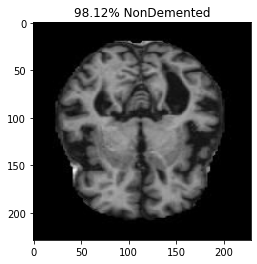

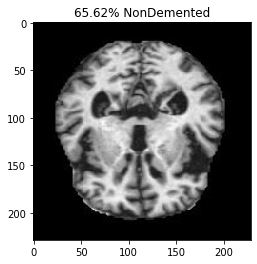

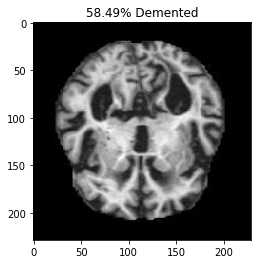

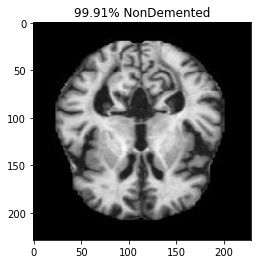

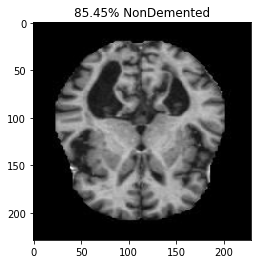

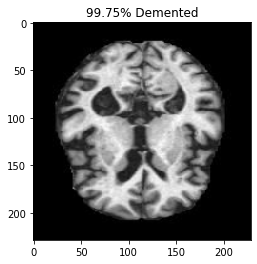

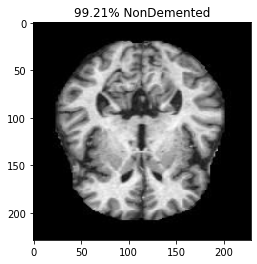

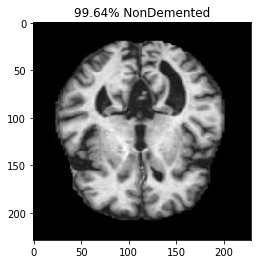

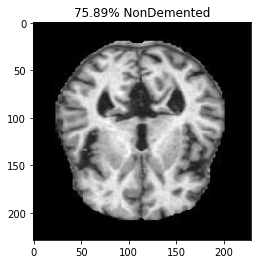

In [32]:
prediction=y_pred[1:10]
for index, probability in enumerate(prediction):
  if probability.item(0) > 0.5:
        plt.title('%.2f' % (probability.item(0)*100) + '% Demented')
  else:
        plt.title('%.2f' % ((1-probability.item(0))*100) + '% NonDemented')
  plt.style.reload_library
  plt.imshow(Dem_images[index])
  plt.show()

In [33]:
y_pred=model1.predict(X_test)
y_pred

array([[2.91953355e-01, 7.08046615e-01],
       [1.88031364e-02, 9.81196821e-01],
       [3.43760133e-01, 6.56239867e-01],
       [5.84877193e-01, 4.15122837e-01],
       [8.86235794e-04, 9.99113739e-01],
       [1.45516127e-01, 8.54483843e-01],
       [9.97529805e-01, 2.47016270e-03],
       [7.91000016e-03, 9.92089987e-01],
       [3.57498694e-03, 9.96424973e-01],
       [2.41145357e-01, 7.58854687e-01],
       [1.17250234e-02, 9.88274932e-01],
       [4.73173767e-01, 5.26826262e-01],
       [2.00497180e-01, 7.99502790e-01],
       [1.70315877e-01, 8.29684138e-01],
       [3.19698378e-02, 9.68030214e-01],
       [5.42528089e-03, 9.94574726e-01],
       [2.26822332e-03, 9.97731864e-01],
       [1.44113123e-01, 8.55886877e-01],
       [5.41043699e-01, 4.58956301e-01],
       [4.76852059e-01, 5.23147941e-01],
       [7.16892071e-04, 9.99283135e-01],
       [5.98514557e-01, 4.01485443e-01],
       [4.60458100e-02, 9.53954220e-01],
       [4.95791525e-01, 5.04208505e-01],
       [6.551987

Confusion Matrix without Normalization


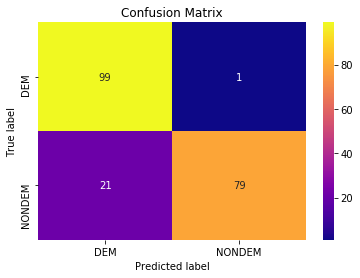

Confusion Matrix with Normalized Values


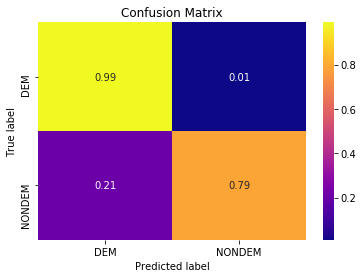

In [34]:
def plot_confusion_matrix(normalize):
  classes = ['DEM','NONDEM']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(1),normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.savefig('VGG19_Confusion_Matrix.png')
  plt.show()
 
print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)
 
print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90       100
           1       0.99      0.79      0.88       100

    accuracy                           0.89       200
   macro avg       0.91      0.89      0.89       200
weighted avg       0.91      0.89      0.89       200



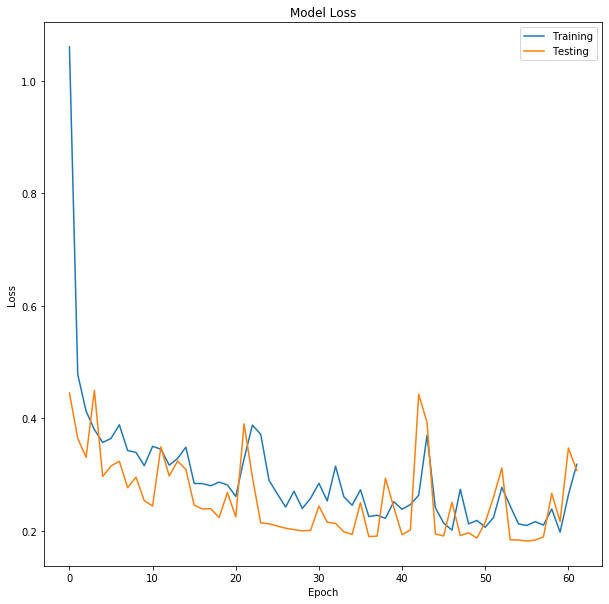

In [36]:
plt.figure(figsize=(10,10))
 
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
 
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
 
plt.legend(['Training', 'Testing'])
plt.savefig('VGG19_dem_loss.png')
plt.show()